In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from network_model import *

import sys
#!{sys.executable} -m pip install [arg]
import time
import pickle
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [3]:
N = 1250
g = nx.powerlaw_cluster_graph(n=N, m=2, p=0.5)

communities = get_communities(g)
community_membership = get_community_membership(g, communities)

In [ ]:
timea = time.time()
W, C, A, R, P, T, communities, S = simulation(NUM_AGENTS=N,
                                              STEPS=50,
                                              PROJECT_COST=0.1,
                                              graph=g,
                                              ALPHA_BETA=0.8,
                                              gain_right=2.0,
                                              prob_left=0.3,
                                              init_wealth_scale=0.02,
                                              risk_scale=10.0,
                                              poisson_scale=12,
                                              communities=communities,
                                              community_membership=community_membership,
                                              seed=123)
print(time.time()-timea)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pymarkowitz/Optimizer.py:368: UserWarning: "Detected no beta input. Will not be able to perform any beta-related optimization.
  warnings.warn(""""Detected no beta input. Will not be able to perform any beta-related optimization.""")


Python 3.8.6 (v3.8.6:db455296be, Sep 23 2020, 13:31:39) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.18.1 -- An enhanced Interactive Python. Type '?' for help.

In [1]: community_membership
Out[1]: 
{514: array([  0, 264, 133,  17]),
 1068: array([  0, 264, 133]),
 163: array([264,   1,  56, 108]),
 1028: array([264,   1, 108]),
 516: array([264,   2, 246]),
 334: array([264,   2, 125]),
 303: array([264,   2, 115, 262]),
 517: array([264, 113,   3]),
 333: array([  3, 134, 264, 236, 116]),
 1157: array([264,  56,   3]),
 928: array([264,   4, 141,  52]),
 938: array([264,   4, 125]),
 1031: array([264,   4, 125]),
 523: array([264, 145,   5, 135]),
 1223: array([264,   5, 135]),
 525: array([264, 116, 244,   6]),
 527: array([264, 116,   6]),
 257: array([264,   7]),
 614: array([264,  62,   7]),
 170: array([264, 262,   7]),
 45: array([ 89,   7, 264, 169, 115, 246, 153, 124, 125]),
 1039: array([264,   7]),
 528: array([  8, 264, 125]),
 157: array([  8, 


In [2]: exit



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pymarkowitz/Optimizer.py:368: UserWarning: "Detected no beta input. Will not be able to perform any beta-related optimization.
  warnings.warn(""""Detected no beta input. Will not be able to perform any beta-related optimization.""")


Python 3.8.6 (v3.8.6:db455296be, Sep 23 2020, 13:31:39) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.18.1 -- An enhanced Interactive Python. Type '?' for help.

In [1]: i
Out[1]: 4

In [2]: community_membership
Out[2]: array([ 36, 228, 264, 136,  75, 115])

In [3]: mu
Out[3]: 
array([1.68793627, 1.20773125, 1.1       , 1.37892992, 0.91211099,
       1.14603827])

In [4]: gambles_prior_mu
Out[4]: 
array([1.45494974, 1.36109165, 1.1       , 1.39352564, 1.36804361,
       1.37177271])

In [5]: PORTFOLIOS[4]
Out[5]: 
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.      

In [ ]:
1250 * 

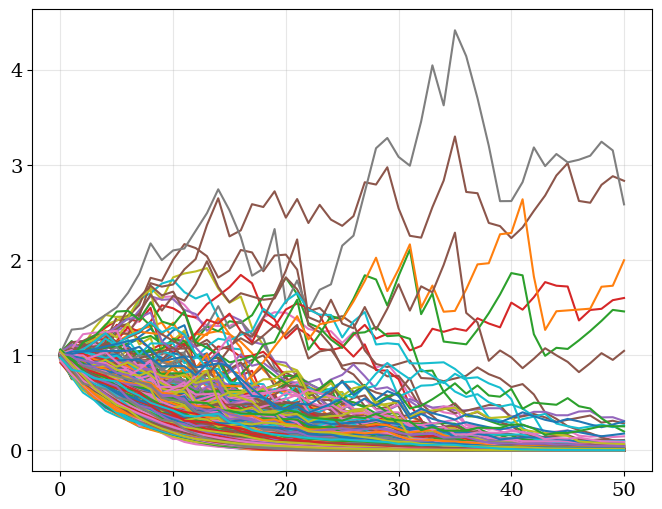

In [41]:
for i in range(W.shape[1]):
    plt.plot(W[:,i])
plt.show()

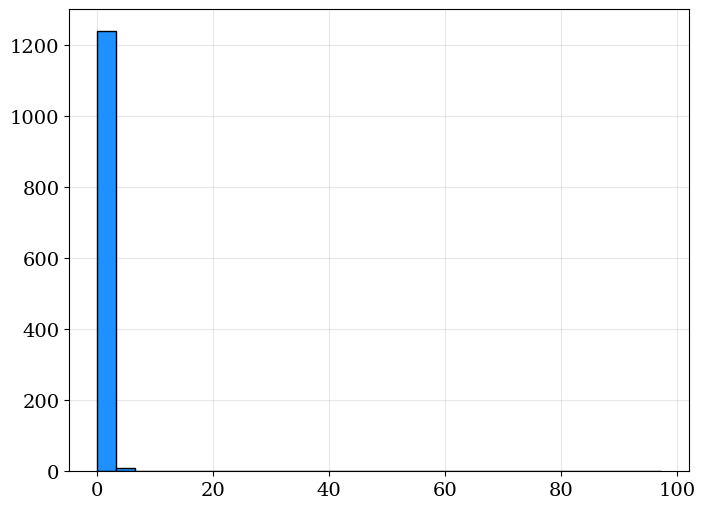

In [593]:
plt.hist(W[-1], bins=30, color="dodgerblue", edgecolor="k")
plt.show()

### Cluster trajectories

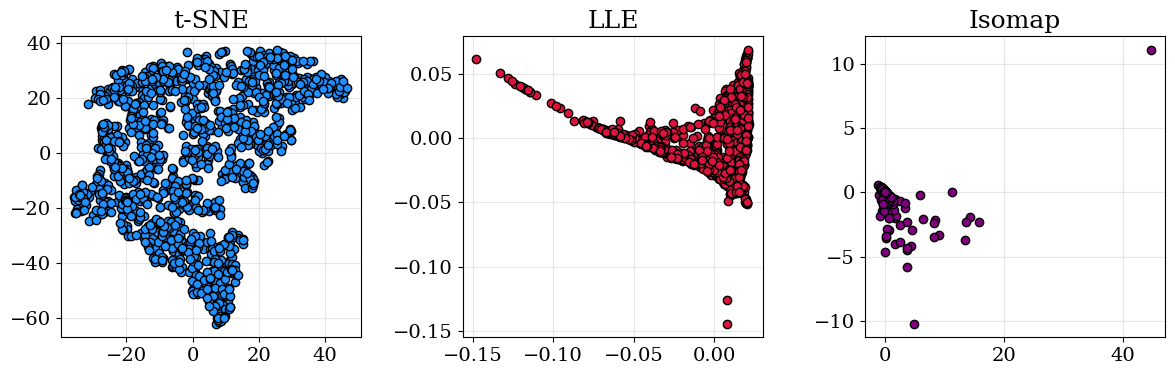

In [239]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap

fig, axs = plt.subplots(1,3, figsize=(12,4))
colors = ["dodgerblue", "crimson", "purple"]
titles = ["t-SNE", "LLE", "Isomap"]
kwargs = [{"perplexity":30}, {"method":"modified"}, {}]

for i,algo in enumerate([TSNE, LocallyLinearEmbedding, Isomap]):
    X = algo(n_components=2, **kwargs[i]).fit_transform(W.T)
    axs[i].scatter(X[:,0], X[:,1], c=colors[i], edgecolor="k")
    axs[i].set_title(titles[i])

fig.tight_layout()
plt.show()

### Crossover points

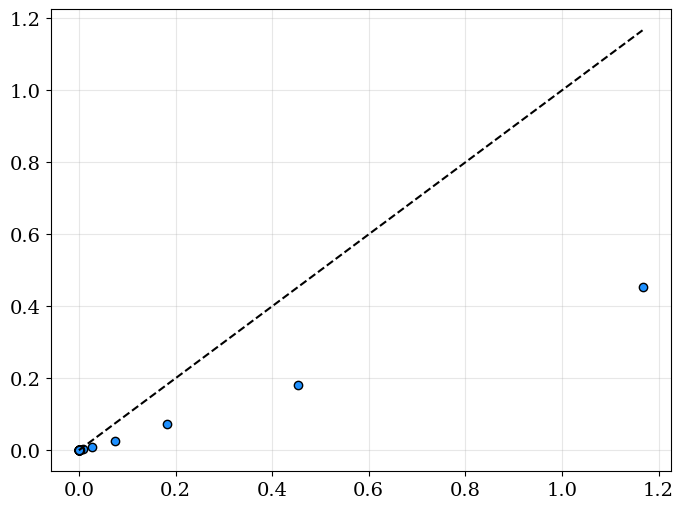

In [13]:
i = 10

x=[]
y=[]
for k in range(len(W)-1):
    x.append(W[k][i])
    y.append(W[k+1][i])

plt.scatter(x,y, color="dodgerblue", edgecolor="k")
plt.plot(np.linspace(min(x), max(x), 100), np.linspace(min(x), max(x), 100), color="k", linestyle="dashed")
plt.show()